MovieLens 1M Dataset GroupLens Research provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata (genres and year), and demographic data about the users (age, zip code, gender identification, and occupation). Such data is often of interest in the development of recommendation systems based on machine learning algorithms. While we do not explore machine learning techniques in detail in this book, I will show you how to slice and dice datasets like these into the exact form you need. The MovieLens 1M dataset contains 1 million ratings collected from 6,000 users on 4,000 movies. It’s spread across three tables: ratings, user information, and movie information. After extracting the data from the ZIP file, we can load each table into a pandas DataFrame object using pandas.read_table and perform the following task.

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# 1. Perform null values identification in the given dataset.

## For 'ratings.dat'

In [2]:
ratings = pd.read_table('Data/ratings.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

In [3]:
print(ratings.isnull().sum())

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64


## For 'users.dat'

In [4]:
users = pd.read_table('Data/users.dat', sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zip_code'])

In [5]:
print(users.isnull().sum())

user_id       0
gender        0
age           0
occupation    0
zip_code      0
dtype: int64


## For 'movies.dat'

In [6]:
movies = pd.read_table('Data/movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'], encoding='latin1')

In [7]:
print(movies.isnull().sum())

movie_id    0
title       0
genres      0
dtype: int64


# 2. Identify types of attributes in the dataset.

## For 'ratings.dat'

In [8]:
ratings = pd.read_table('Data/ratings.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

In [9]:
print(ratings.dtypes)

user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object


## For 'users.dat'

In [10]:
users = pd.read_table('Data/users.dat', sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zip_code'])

In [11]:
print(users.dtypes)

user_id        int64
gender        object
age            int64
occupation     int64
zip_code      object
dtype: object


## For 'movies.dat'

In [12]:
movies = pd.read_table('Data/movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'], encoding='latin1')

In [13]:
print(movies.dtypes)

movie_id     int64
title       object
genres      object
dtype: object


# 3. Plot Box plot and violin plot. (also state the inference of each attribute and also find the outlier in the attribute)

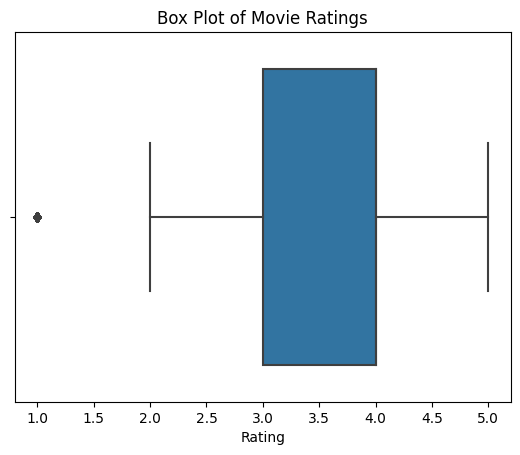

In [14]:
sns.boxplot(x=ratings['rating'])
plt.title('Box Plot of Movie Ratings')
plt.xlabel('Rating')
plt.show()

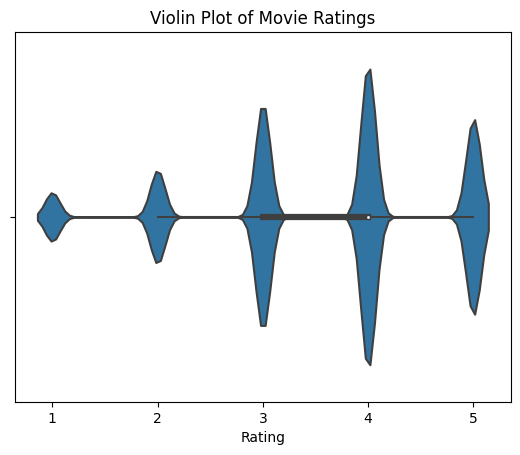

In [15]:
sns.violinplot(x=ratings['rating'])
plt.title('Violin Plot of Movie Ratings')
plt.xlabel('Rating')
plt.show()

## Calculation of the quartiles of the rating column

In [16]:
q1 = ratings['rating'].quantile(0.25)
q3 = ratings['rating'].quantile(0.75)

In [17]:
iqr = q3 - q1

In [18]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [19]:
outliers = ratings[(ratings['rating'] < lower_bound) | (ratings['rating'] > upper_bound)]

In [20]:
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 56174


In [21]:
print(outliers)

         user_id  movie_id  rating  timestamp
148            2        21       1  978299839
180            2      3893       1  978299535
205            3      1261       1  978297663
249            4      3527       1  978294008
268            5      2916       1  978245645
...          ...       ...     ...        ...
1000171     6040      3388       1  956716407
1000177     6040      2751       1  956716438
1000185     6040      2794       1  956716438
1000187     6040      2003       1  956716294
1000204     6040      1091       1  956716541

[56174 rows x 4 columns]


# Histogram and identification of overlapping.(also state the inference for each attribute.)

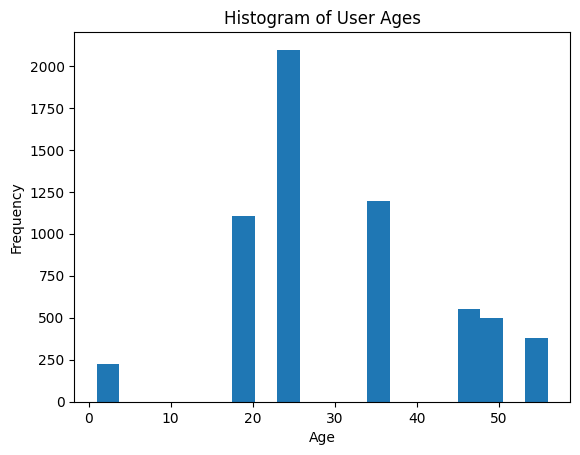

In [22]:
plt.hist(users['age'], bins=20)
plt.title('Histogram of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

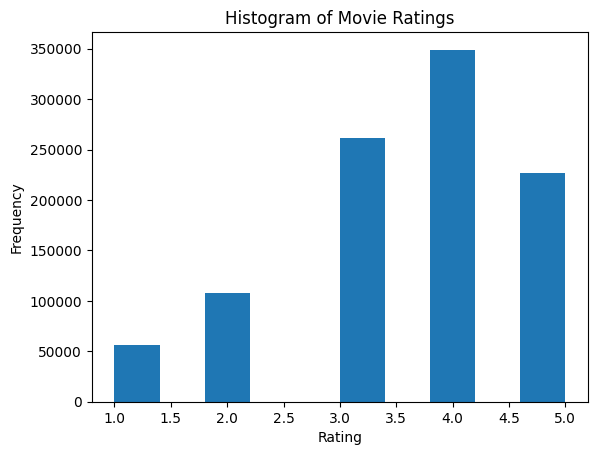

In [23]:
plt.hist(ratings['rating'], bins=10)
plt.title('Histogram of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [24]:
merged_df = pd.merge(ratings, users, on='user_id')

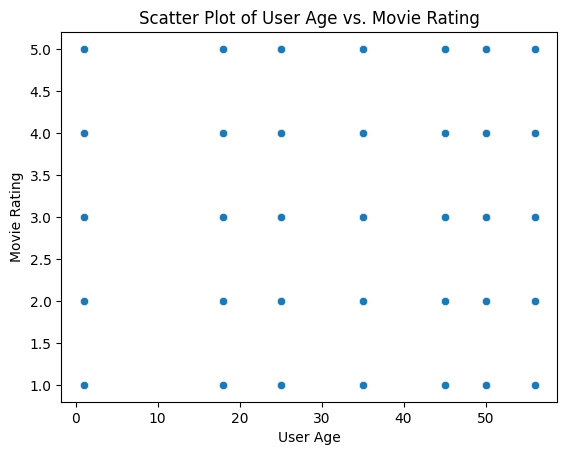

In [25]:
sns.scatterplot(x='age', y='rating', data=merged_df)
plt.title('Scatter Plot of User Age vs. Movie Rating')
plt.xlabel('User Age')
plt.ylabel('Movie Rating')
plt.show()

# 5. Draw different types of scatter plot.(using seaborn library) 

In [26]:
merged_df = pd.merge(ratings, users, on='user_id')

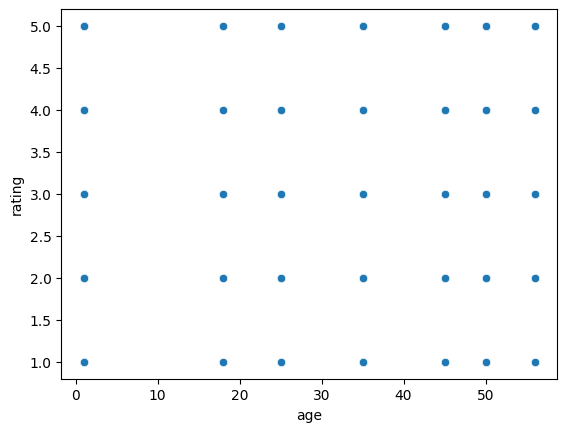

In [27]:
sns.scatterplot(x='age', y='rating', data=merged_df)
plt.show()

# 6. Univariate and multivariate analysis

## Univariate Analysis

<AxesSubplot: xlabel='rating', ylabel='Count'>

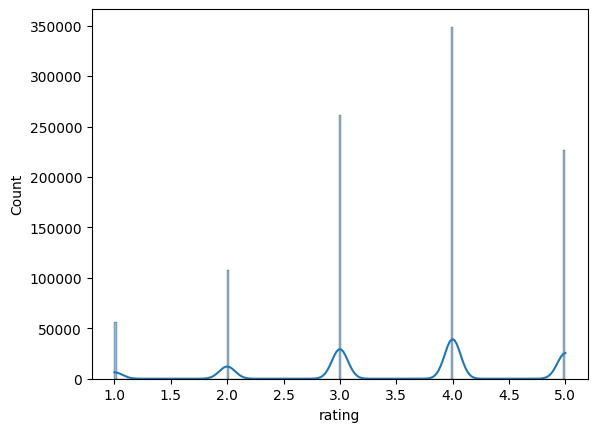

In [28]:
sns.histplot(data=ratings, x='rating', kde=True)

## Multivariate Analysis

In [29]:
data = pd.merge(ratings, users, on='user_id')

<AxesSubplot: xlabel='age', ylabel='rating'>

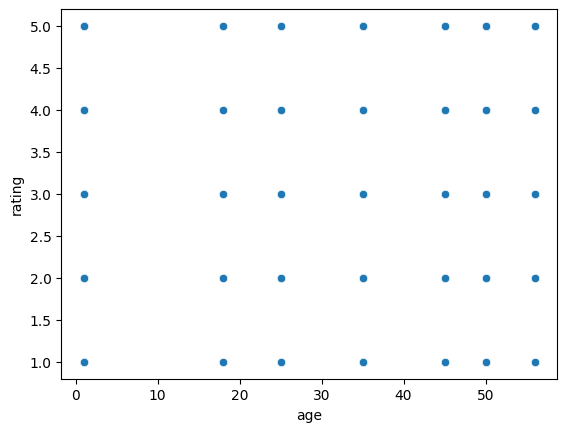

In [30]:
sns.scatterplot(data=data, x='age', y='rating')